In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

from sklearn.preprocessing import MinMaxScaler

from minisom import MiniSom

In [44]:
data_File_Path = r'Self_Organizing_Maps\Credit_Card_Applications.csv'

In [45]:
dataset = pd.read_csv(data_File_Path)

In [46]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# Feature Scaling

In [47]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler( feature_range= (0,1))
X = sc.fit_transform(X)

# Training the SOM

In [48]:
from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualising Result

In [49]:
from pylab import bone, pcolor, colorbar, plot, show

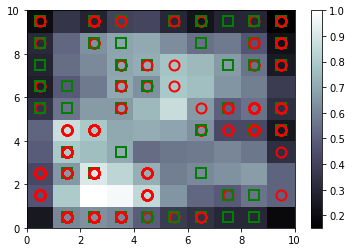

In [50]:
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate (X):
    w = som.winner(x)
    plot(w[0] + 0.5, 
         w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2
        )

show()

In [53]:
mappings = som.win_map(X)

In [57]:
frauds = mappings[(2,2)]
# frauds = np.concatenate((mappings[(5,1)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

frauds

array([[1.5605791e+07, 1.0000000e+00, 1.9500000e+01, 9.5850000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 7.9000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+01, 3.5100000e+02],
       [1.5565714e+07, 1.0000000e+00, 4.2750000e+01, 4.0850000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 4.0000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.0800000e+02, 1.0100000e+02],
       [1.5608688e+07, 1.0000000e+00, 1.5170000e+01, 7.0000000e+00,
        2.0000000e+00, 1.0000000e+01, 4.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 6.0000000e+02, 1.0000000e+00],
       [1.5609070e+07, 1.0000000e+00, 1.8000000e+01, 1.6500000e-01,
        2.0000000e+00, 1.1000000e+01, 7.0000000e+00, 2.1000000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,

In [63]:
customers = dataset.iloc[:,1:].values

is_fraud = np.zeros(len(dataset))

print (len(dataset))


if i in range (0, len(dataset)):
    print (i)
#     print(dataset.iloc[i,0])
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1
        

690
689
